# Customer Personality Analysis

In this notebook we will use an unsupervised machine learning model to analyze a company’s customers.  
You can get the dataset from this page [https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)  

**Attributes**

People : 

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products :

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion :

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place :

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

from datetime import datetime

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (16,9)

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Load the dataset

In [2]:
df = pd.read_csv("../data/unsupervised/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
h, w = df.shape
print(f'The data has {h} rows and {w} columns')

The data has 2240 rows and 29 columns


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 25 int columns, 3 object columns and 1 float column.

### Missing Data

In [5]:
df.isna().sum().sort_values(ascending =False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Since there are only 24 null values, we will just removed them.

In [6]:
df = df.dropna()

### Summary Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


We can see that:
- The column ID is useless
- The columns Z_CostContact and Z_Revenue are useless because they are constants
- The Year_Birth column contains outliers, the min value is 1873
- The Income column contains also outliers

We can also remove the column Dt_Customer

In [8]:
df = df.drop(columns=["ID", "Z_CostContact", "Z_Revenue", "Dt_Customer"], errors='ignore')

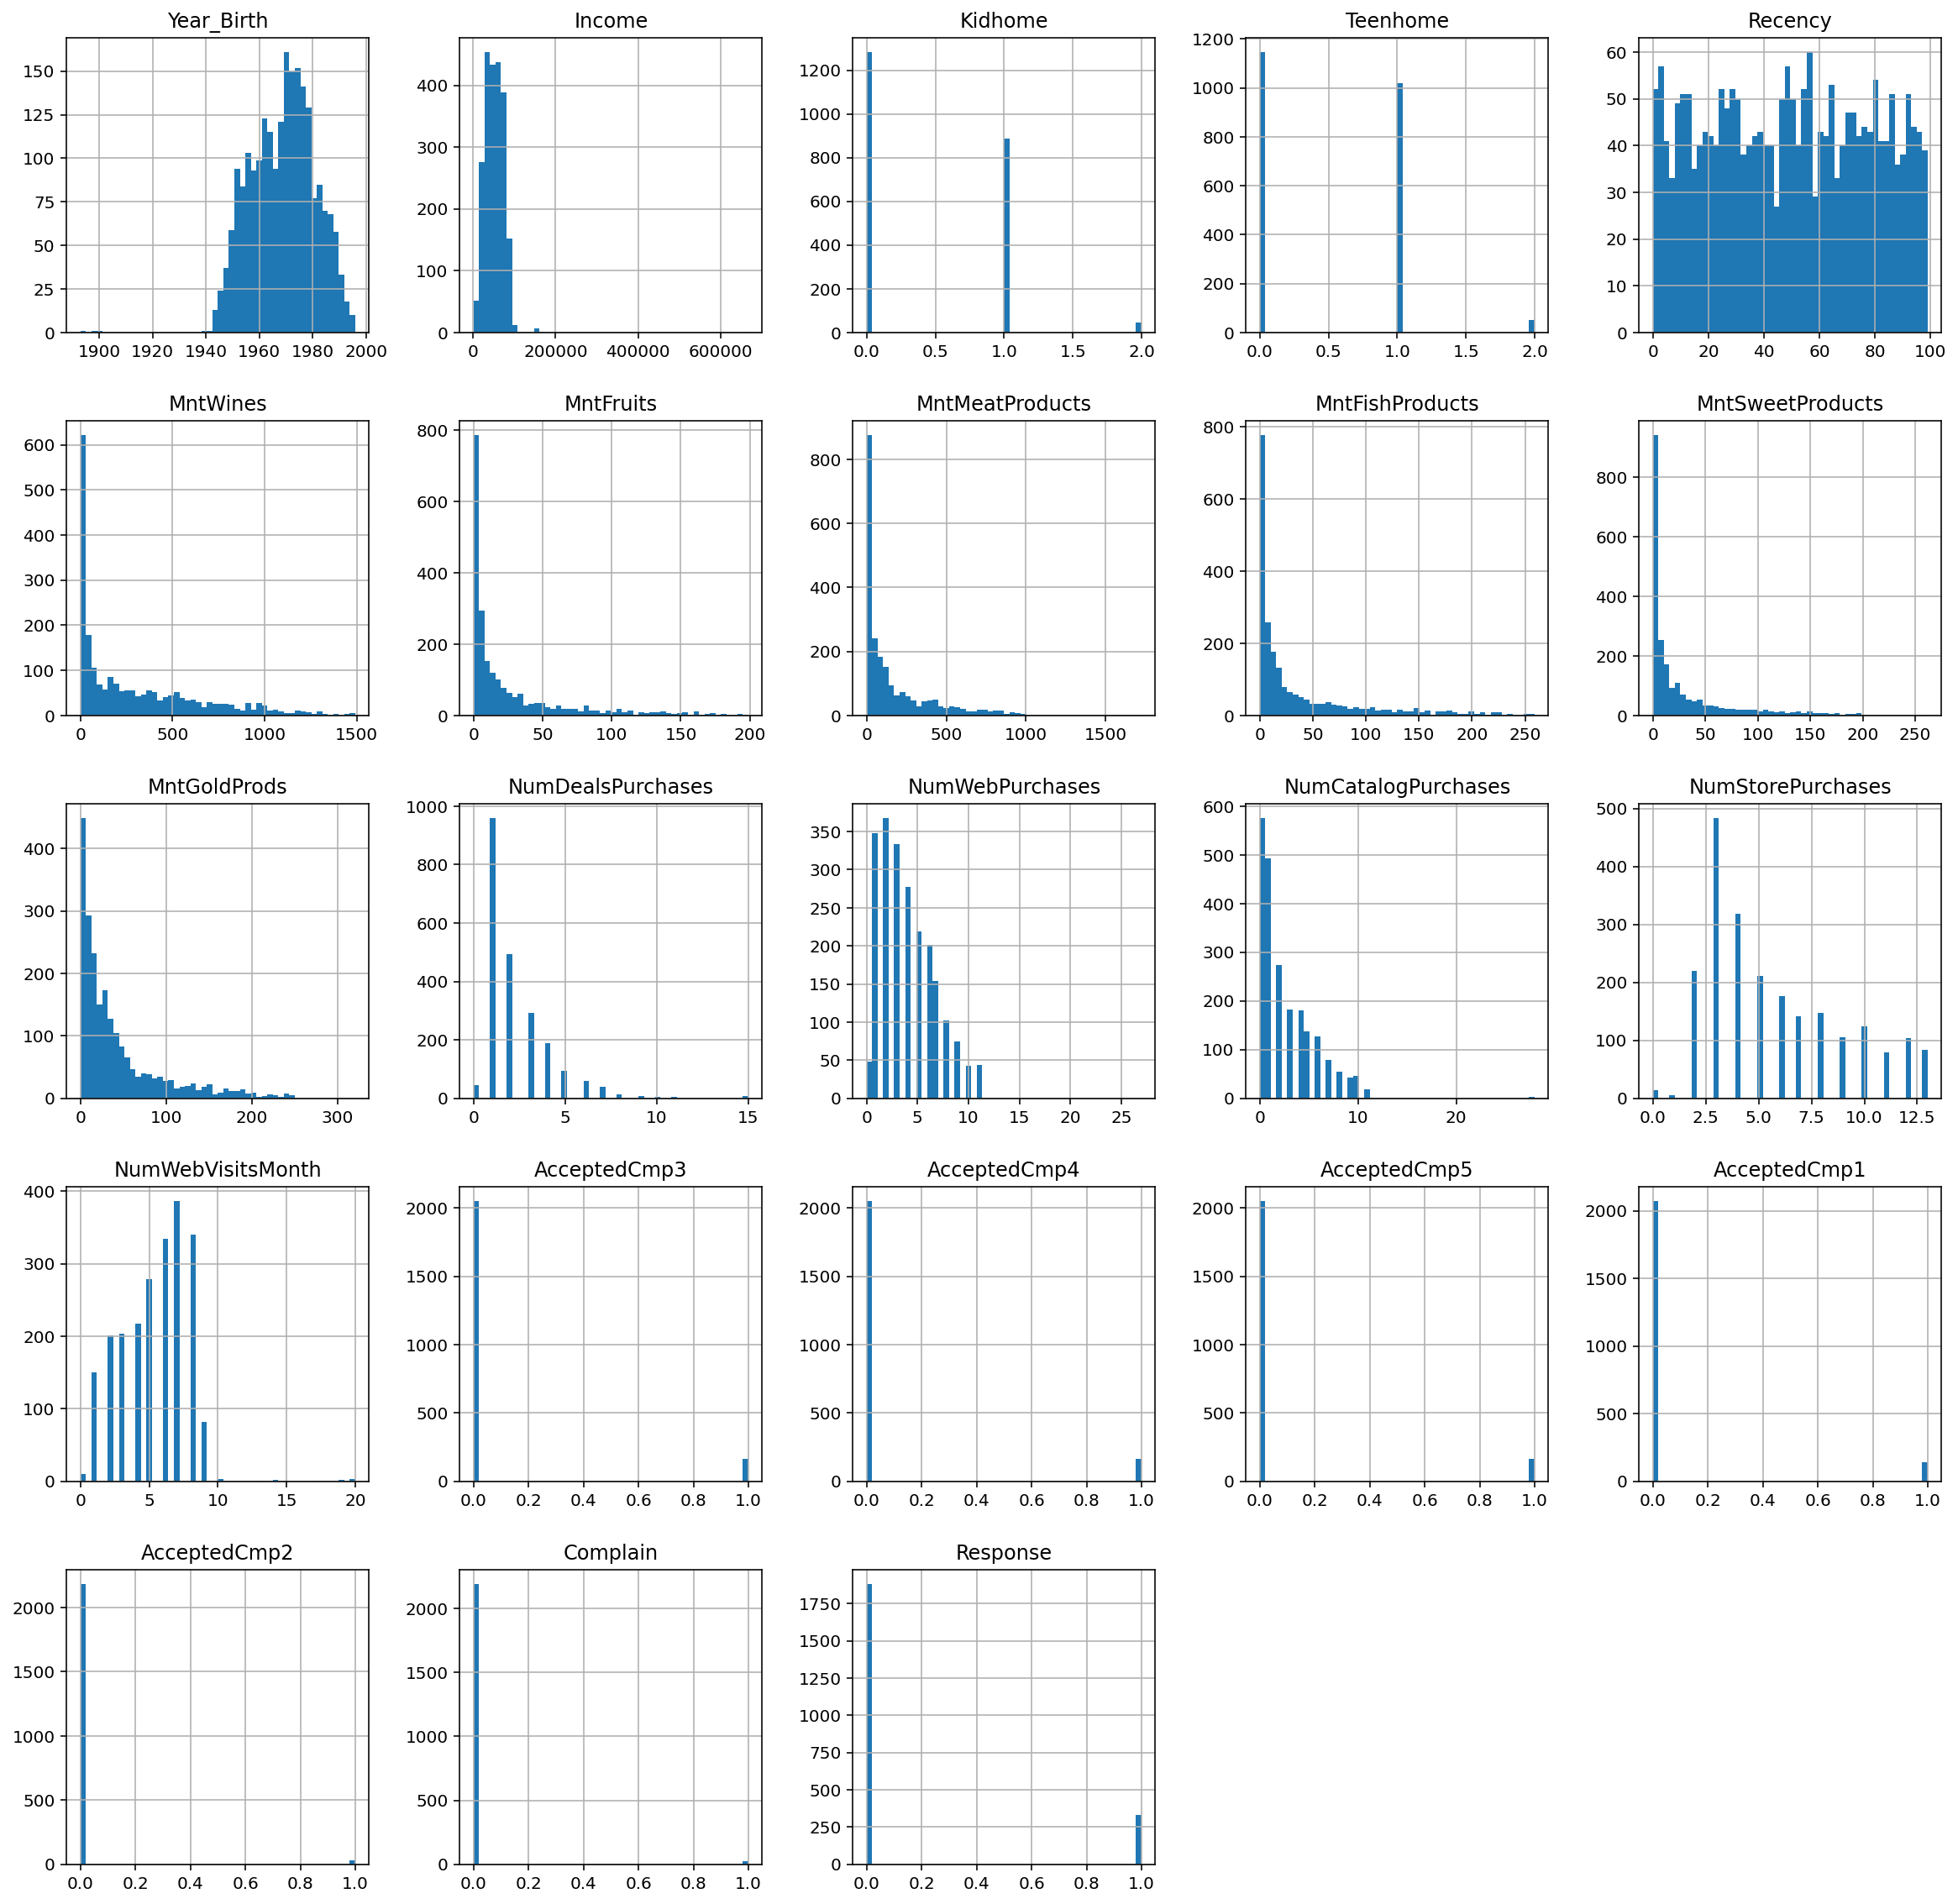

In [9]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

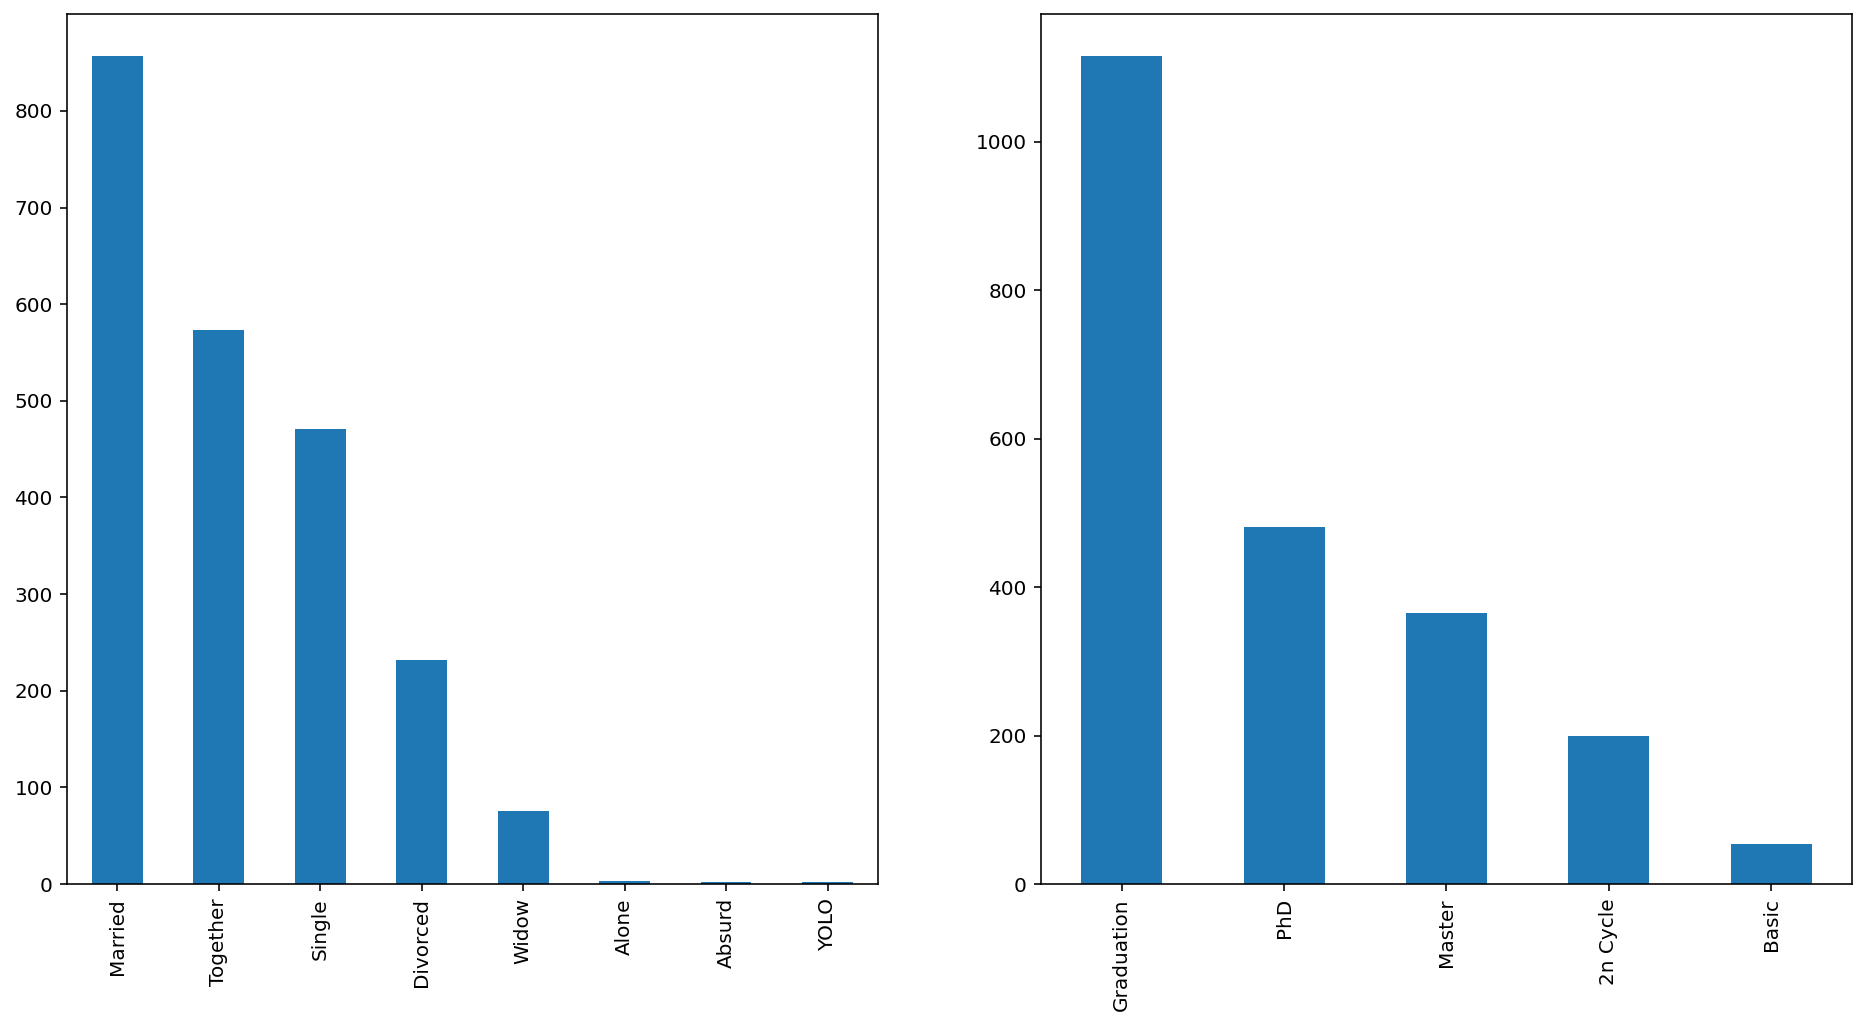

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df['Marital_Status'].value_counts().plot(kind='bar', ax=axs[0])
df['Education'].value_counts().plot(kind='bar', ax=axs[1])
plt.show()

## Features Engineering

In [11]:
df_f = df.copy()

In [12]:
df_f["Age"] = datetime.now().year - df_f["Year_Birth"]

In [13]:
df_f['Education'] = df_f['Education'].replace(['PhD', 'Master', 'Graduation', '2n Cycle'], 'Post Graduate')
df_f['Education'] = df_f['Education'].replace(['Basic'], 'Under Graduate')

In [14]:
df_f['Marital_Status'] = df_f['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df_f['Marital_Status'] = df_f['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [15]:
df_f['Expenses'] = (df_f['MntWines'] + df_f['MntFruits'] + df_f['MntMeatProducts'] 
                    + df_f['MntFishProducts'] + df_f['MntSweetProducts'] + df_f['MntGoldProds'])

In [16]:
df_f["Children"] = df_f["Kidhome"] + df_f["Teenhome"]

In [17]:
df_f.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Expenses,Children
0,1957,Post Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,1617,0
1,1954,Post Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,27,2
2,1965,Post Graduate,Relationship,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,776,0
3,1984,Post Graduate,Relationship,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,53,1
4,1981,Post Graduate,Relationship,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,422,1


### Drop redundant columns

In [18]:
df_f = df_f.drop(columns=["Year_Birth"])

### Remove outliers

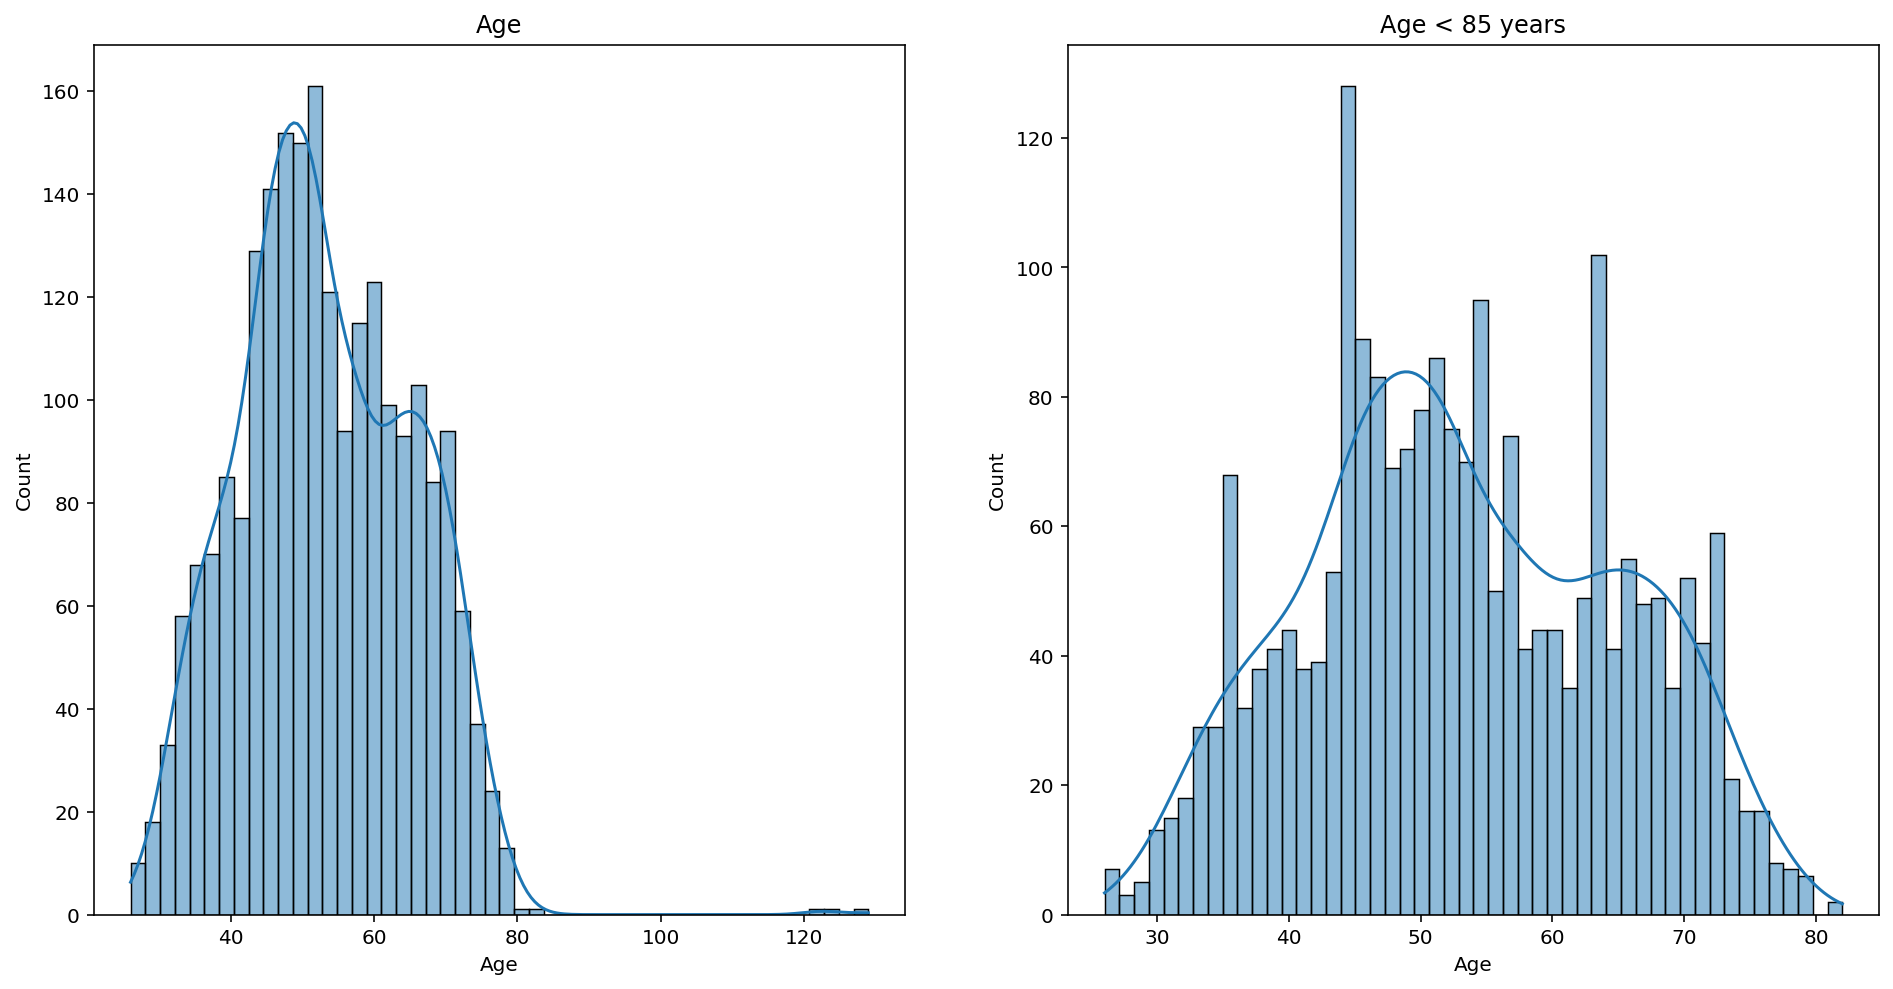

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sn.histplot(data=df_f, x="Age", kde=True, bins=50, ax=axs[0])
sn.histplot(data=df_f[df_f["Age"] < 85], x="Age", kde=True, bins=50, ax=axs[1])

axs[0].set_title("Age")
axs[1].set_title("Age < 85 years")

plt.show()

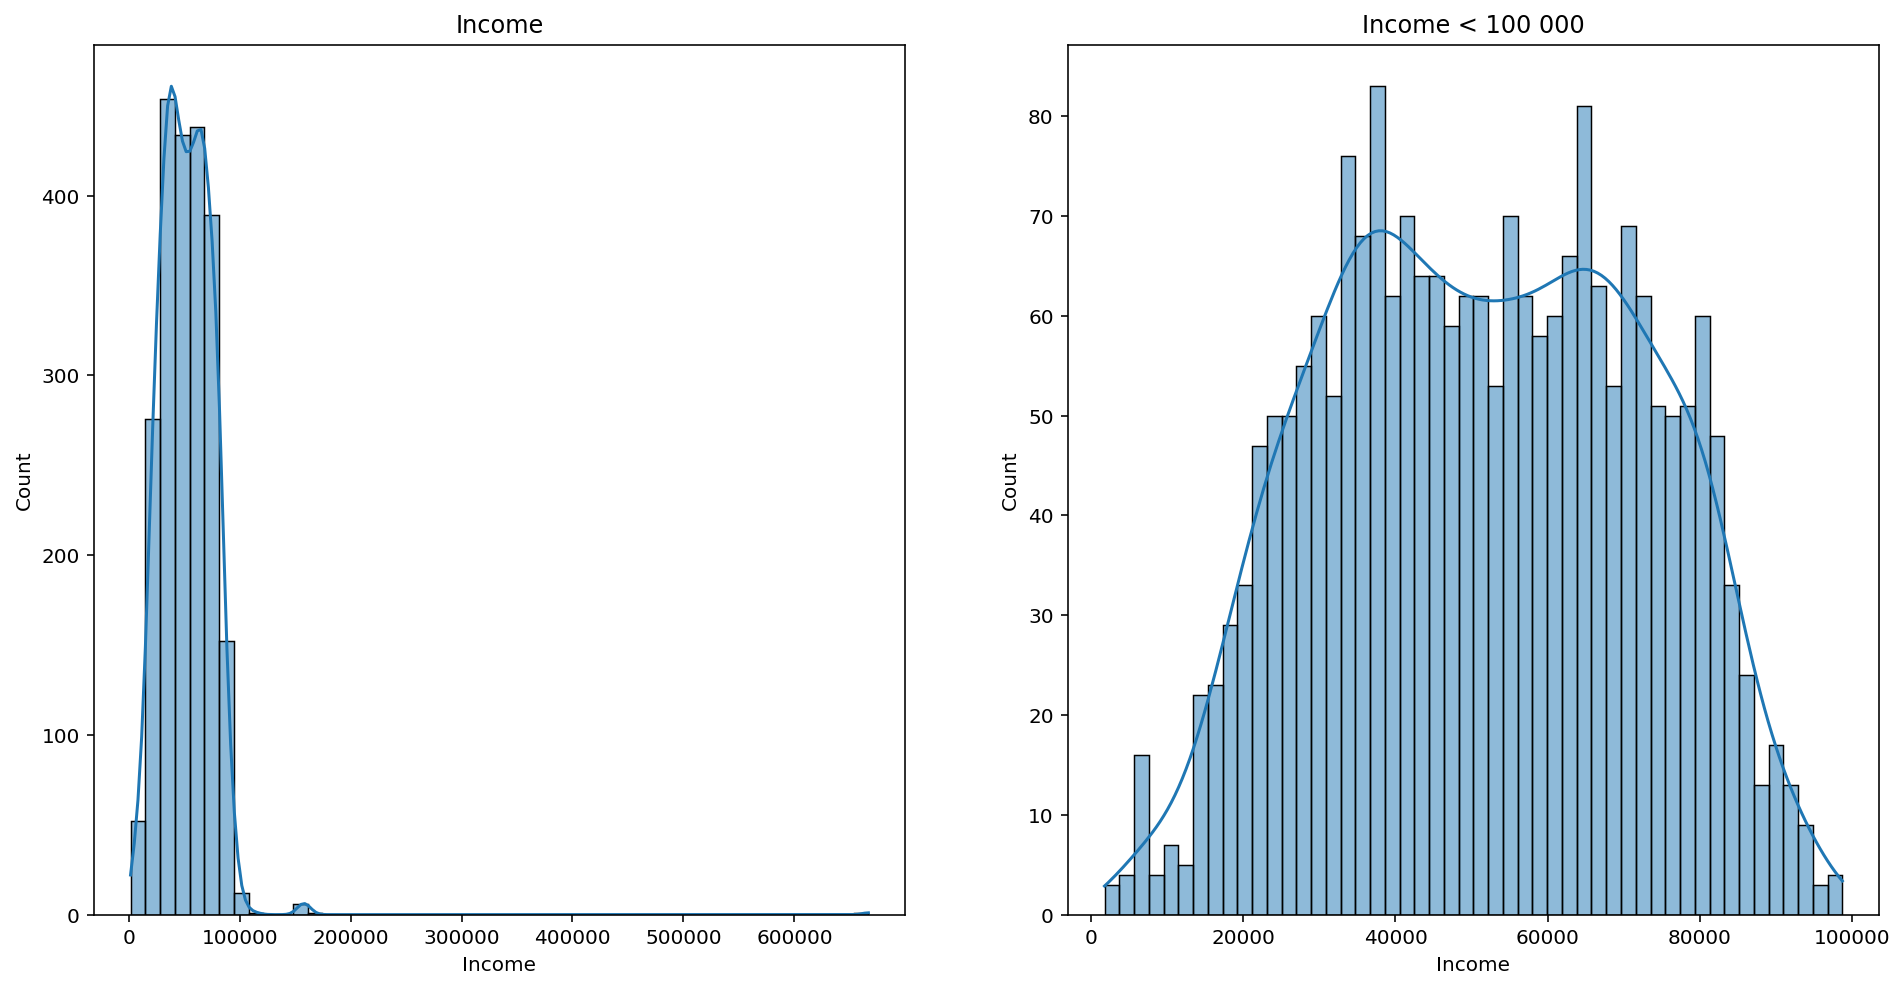

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sn.histplot(data=df_f, x="Income", kde=True, bins=50, ax=axs[0])
sn.histplot(data=df_f[df_f["Income"] < 100_000], x="Income", kde=True, bins=50, ax=axs[1])

axs[0].set_title("Income")
axs[1].set_title("Income < 100 000")

plt.show()

So we will remove all customers where:
- theirs age are > 85
- theirs incomes are > 100_000 

In [21]:
df_ff = df_f.copy()

In [22]:
df_ff = df_ff[df_ff["Age"] < 85]
df_ff = df_ff[df_ff["Income"] < 100_000]

In [23]:
df_ff.shape

(2200, 27)

## Correlation matrix

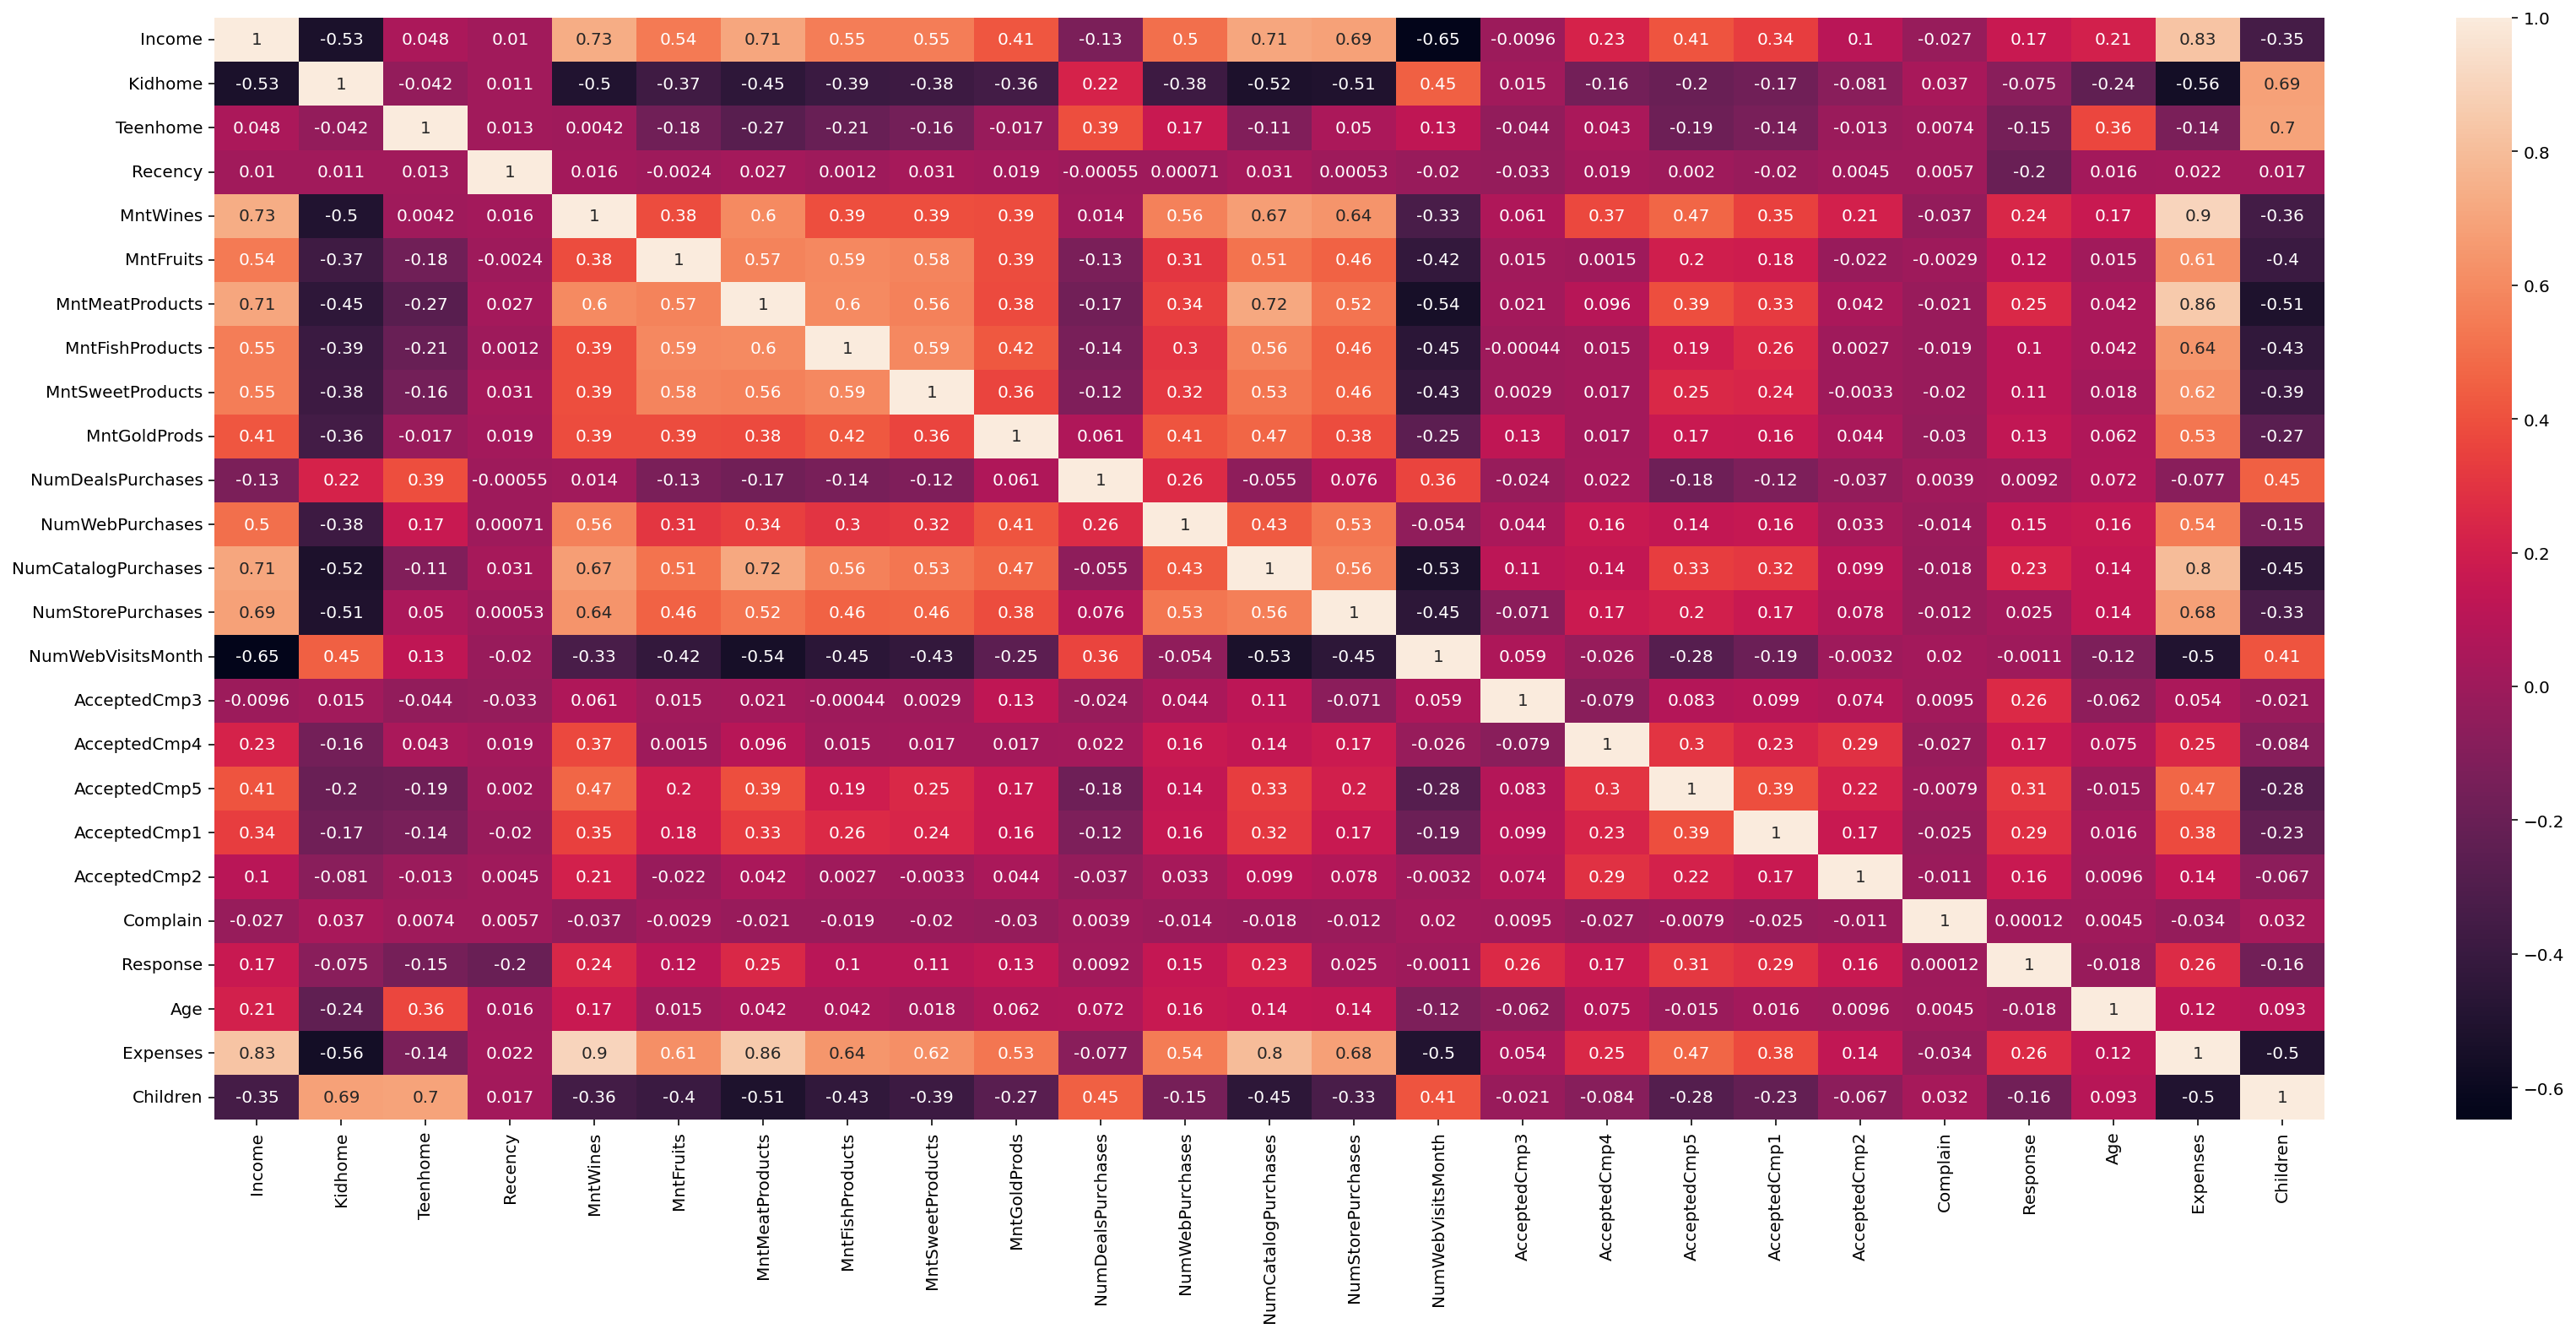

In [24]:
corr = df_ff.corr()
plt.figure(figsize=(28, 12))
sn.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

## Pre Processing and Model

In [25]:
class DoNothing(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X


class FeaturesTransformation:
    def __init__(self, categorical_features, numerical_features, other_features=[]):
        self.categorical_features = categorical_features
        self.numerical_features = numerical_features
        self.other_features = other_features

    def pipeline_categories(self):
        return Pipeline([
            ("one_hot", OneHotEncoder())
        ])

    def pipeline_numerical(self):
        return Pipeline([
            ('std_scaler', StandardScaler())
        ])

    def pipeline_pass(self):
        return Pipeline([
            ("nothing", DoNothing())
        ])

    def pipeline(self):
        return ColumnTransformer([
            ("categories", self.pipeline_categories(), self.categorical_features),
            ("numerical", self.pipeline_numerical(), self.numerical_features),
            ("pass", self.pipeline_pass(), self.other_features),
        ])

In [26]:
cat_features = ["Education", "Marital_Status"]

num_features = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Teenhome', 'Kidhome',
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', "Children",
                'Expenses',]

other_features = ['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                  'AcceptedCmp2', 'Complain', 'Response']

feature_pipeline = FeaturesTransformation(cat_features, num_features, other_features)

In [27]:
df_tr = feature_pipeline.pipeline().fit_transform(df_ff)

In [28]:
df_tr.shape

(2200, 29)

In [29]:
class PcaReduction:
    def pca_eigenvalues(self, X):
        pca = PCA()
        pca.fit(X)

        cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

        plt.figure(figsize=(12, 8))
        plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label="Individual Explained Ratio")
        plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
        plt.xlabel("N components")
        plt.ylabel("Explained Variance Ratio")
        plt.legend(loc="best")
        plt.show()

        return cum_sum_eigenvalues

    def fit_pca(self, X, nb_components):
        pca = PCA(n_components=nb_components)
        pca.fit(X)

        return pd.DataFrame(pca.transform(X), columns=[f"col{i}" for i in range(nb_components)])

In [30]:
def kmeans_curve(X, clusters_range = range(2, 20), axs=None):
    score = [None] * len(clusters_range)

    for i in clusters_range:
        model = KMeans(n_clusters=i, random_state=20)
        model.fit(X)

        score[i - clusters_range[0]] = model.inertia_

    if axs is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        ax = axs

    ax.plot(clusters_range, score)
    style = dict(size=10, color='gray')

    for i in clusters_range:
        ax.text(i, score[i - clusters_range[0]], f"{round(score[i - clusters_range[0]], 1)}", **style)

    ax.set_xlabel("Number of clusters")
    ax.set_ylabel("Inertia")

    if axs is None:
        plt.show()

def compare_curves(X_tr, X_pca_tr):
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))

    kmeans_curve(X_tr, axs=axs[0])
    kmeans_curve(X_pca_tr, axs=axs[1])

    axs[0].set_title("KMeans without PCA")
    axs[1].set_title("KMeans with PCA")

    plt.show()

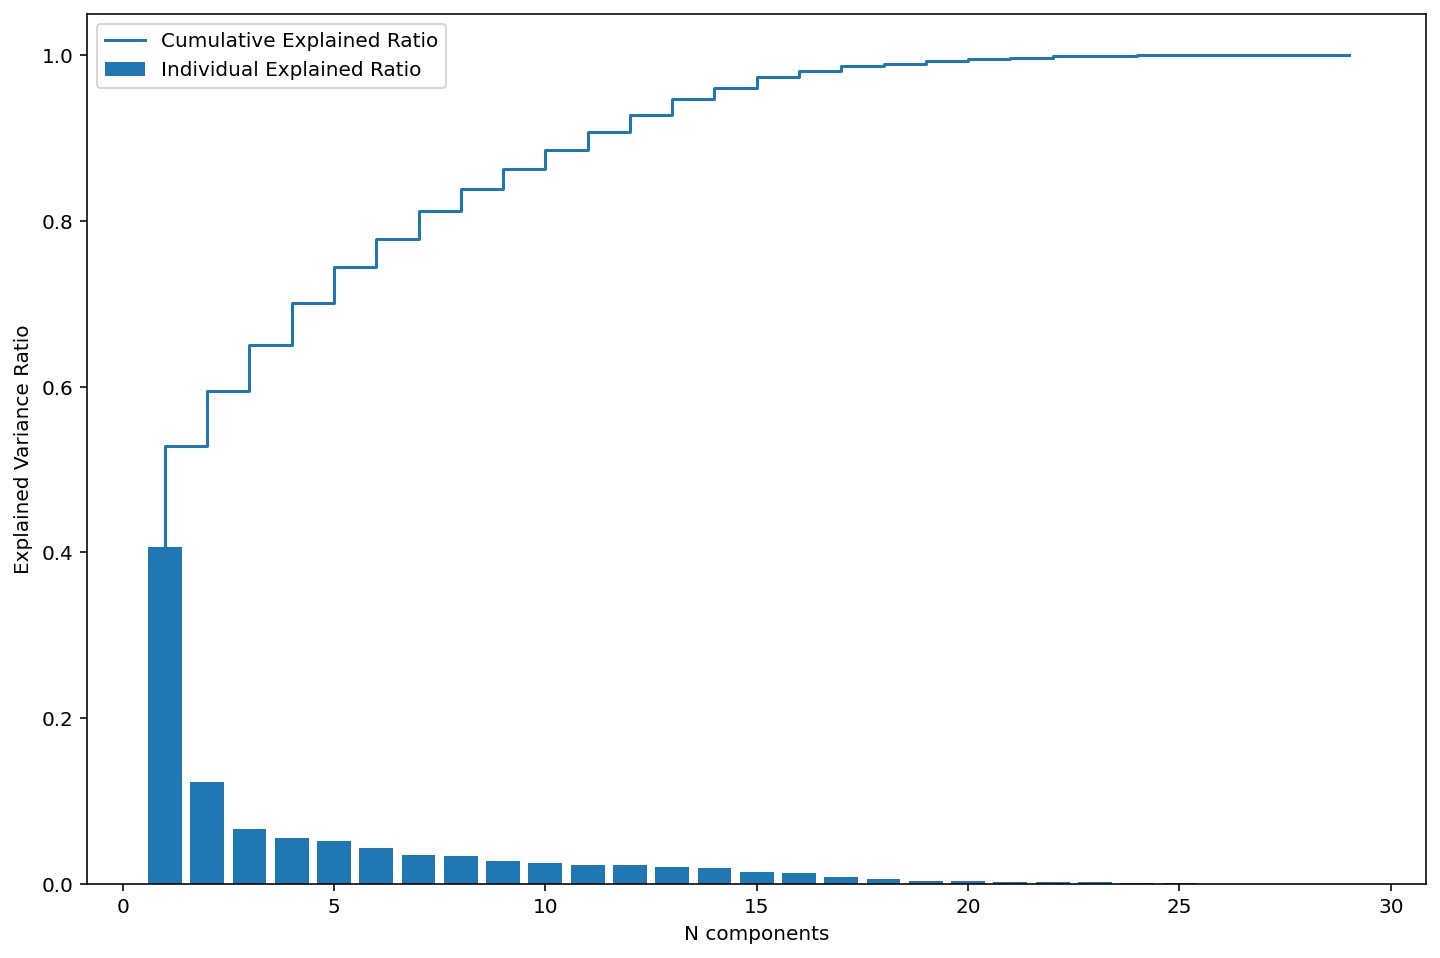

[0.40620221 0.52865336 0.59482651 0.64964417 0.70118173 0.74429537
 0.77840777 0.81138528 0.83838209 0.86290764 0.88583462 0.90768674
 0.92825078 0.94660463 0.96063676 0.97320344 0.98084416 0.98651252
 0.98996505 0.99264734 0.99489276 0.9970936  0.99894264 0.99952652
 1.         1.         1.         1.         1.        ]


In [31]:
pca_reduction = PcaReduction()
print(pca_reduction.pca_eigenvalues(df_tr))

In [32]:
df_tr_pca = pca_reduction.fit_pca(df_tr, 5)

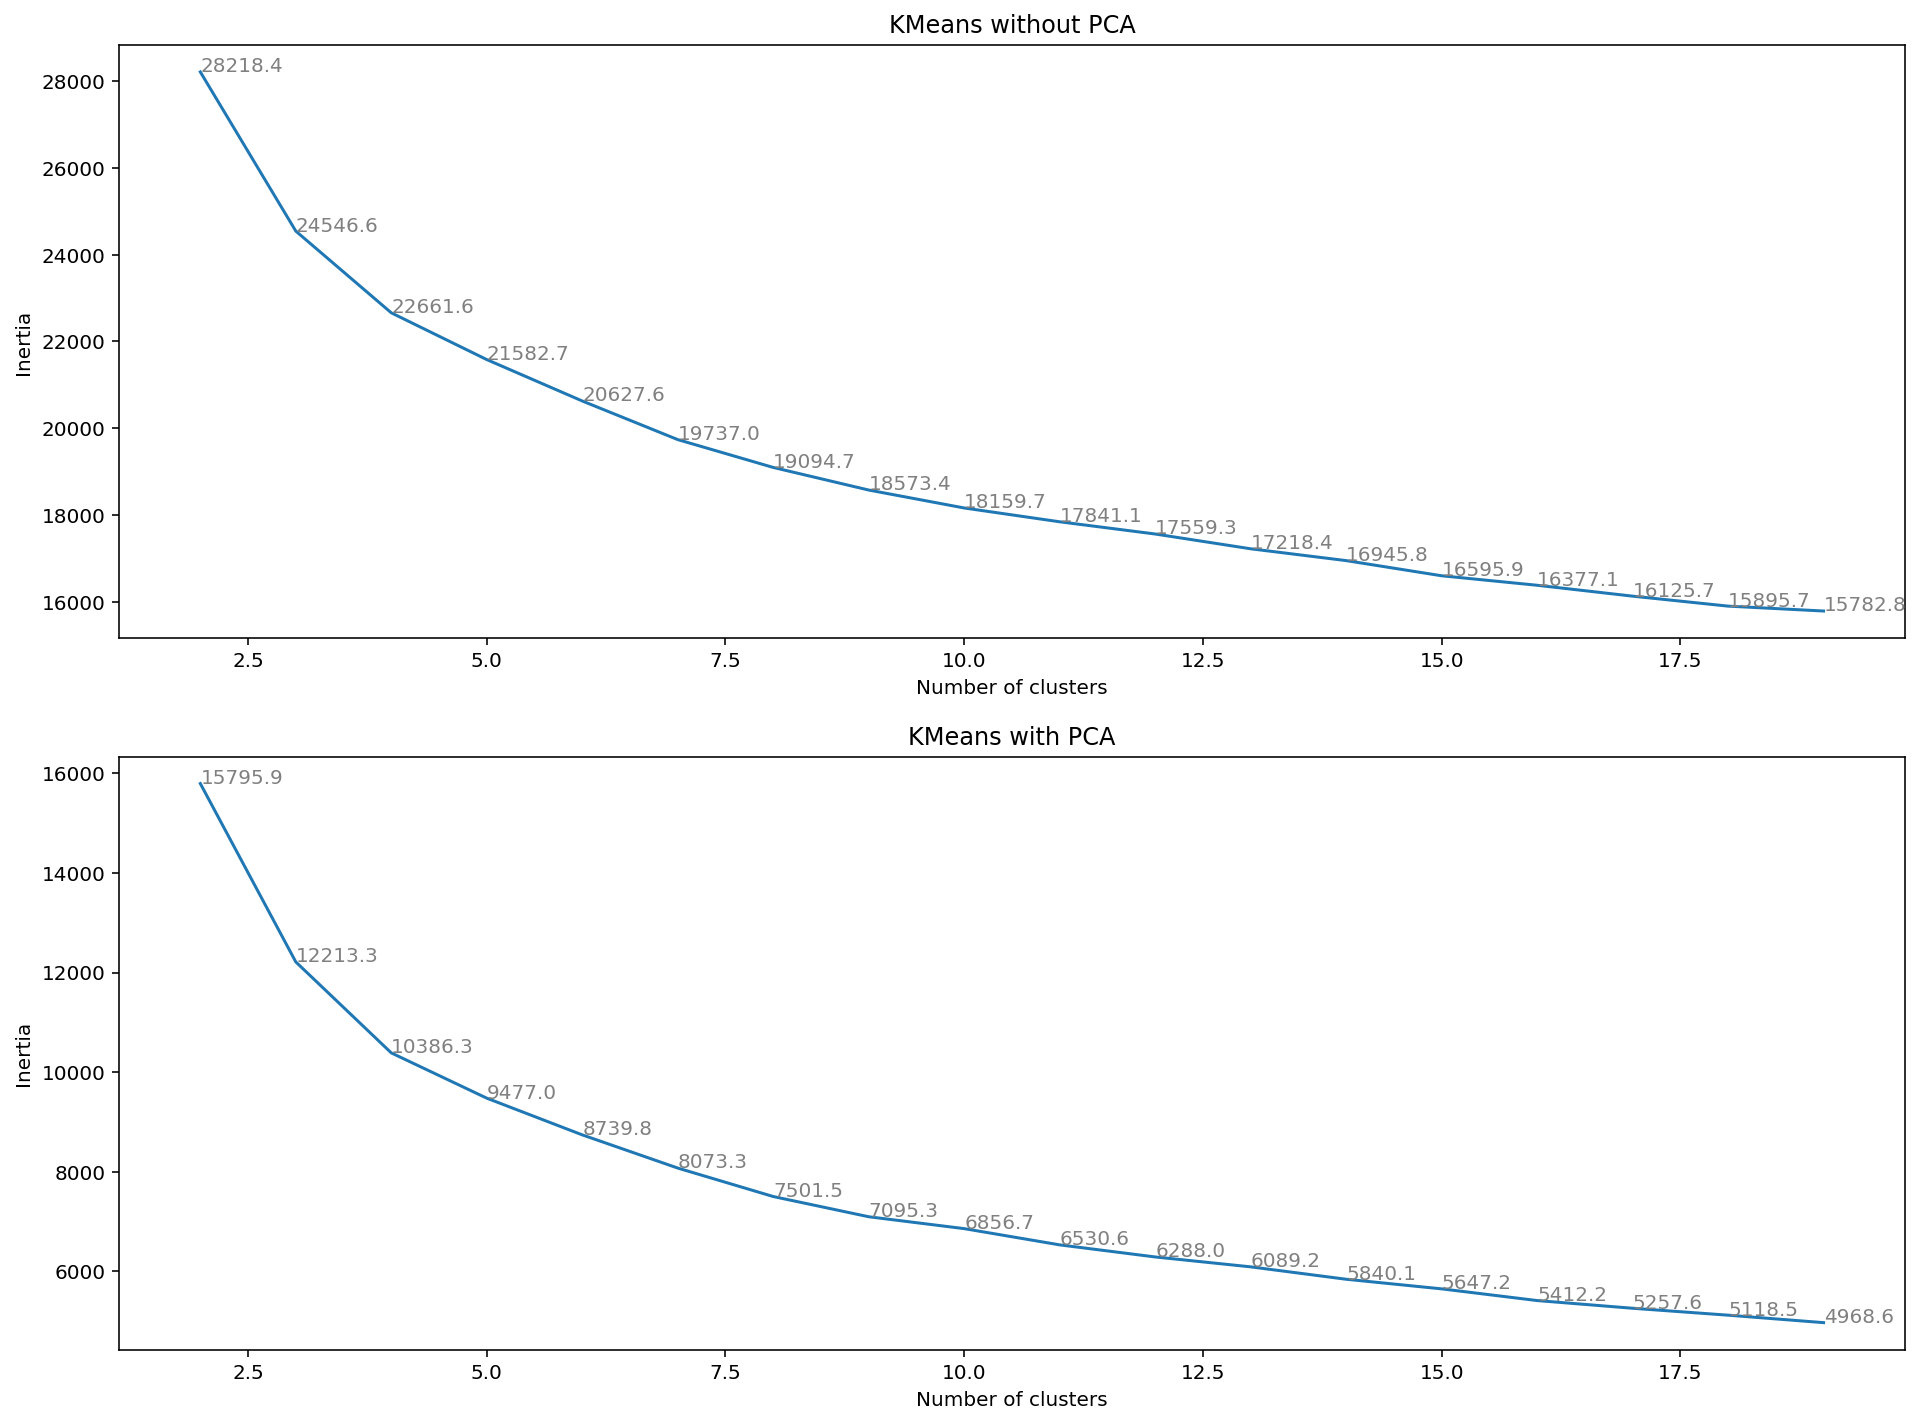

In [33]:
compare_curves(df_tr, df_tr_pca)

In [34]:
def plot_2D(X, x, y, cluster, cluster_pca):
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].scatter(X[x], X[y], c=cluster, marker='o')
    axs[1].scatter(X[x], X[y], c=cluster_pca, marker='o')
    
    axs[0].set_xlabel(x)
    axs[1].set_ylabel(y)
    axs[1].set_xlabel(x)
    axs[0].set_ylabel(y)
    
    axs[0].set_title("Clustering without PCA")
    axs[1].set_title("Clustering with PCA")
    
    plt.show()

In [39]:
model_kmeans = KMeans(4, random_state=20)
cluster = model_kmeans.fit(df_tr).predict(df_tr)

model_kmeans_pca = KMeans(4, random_state=20)
cluster_pca = model_kmeans_pca.fit(df_tr_pca).predict(df_tr_pca)

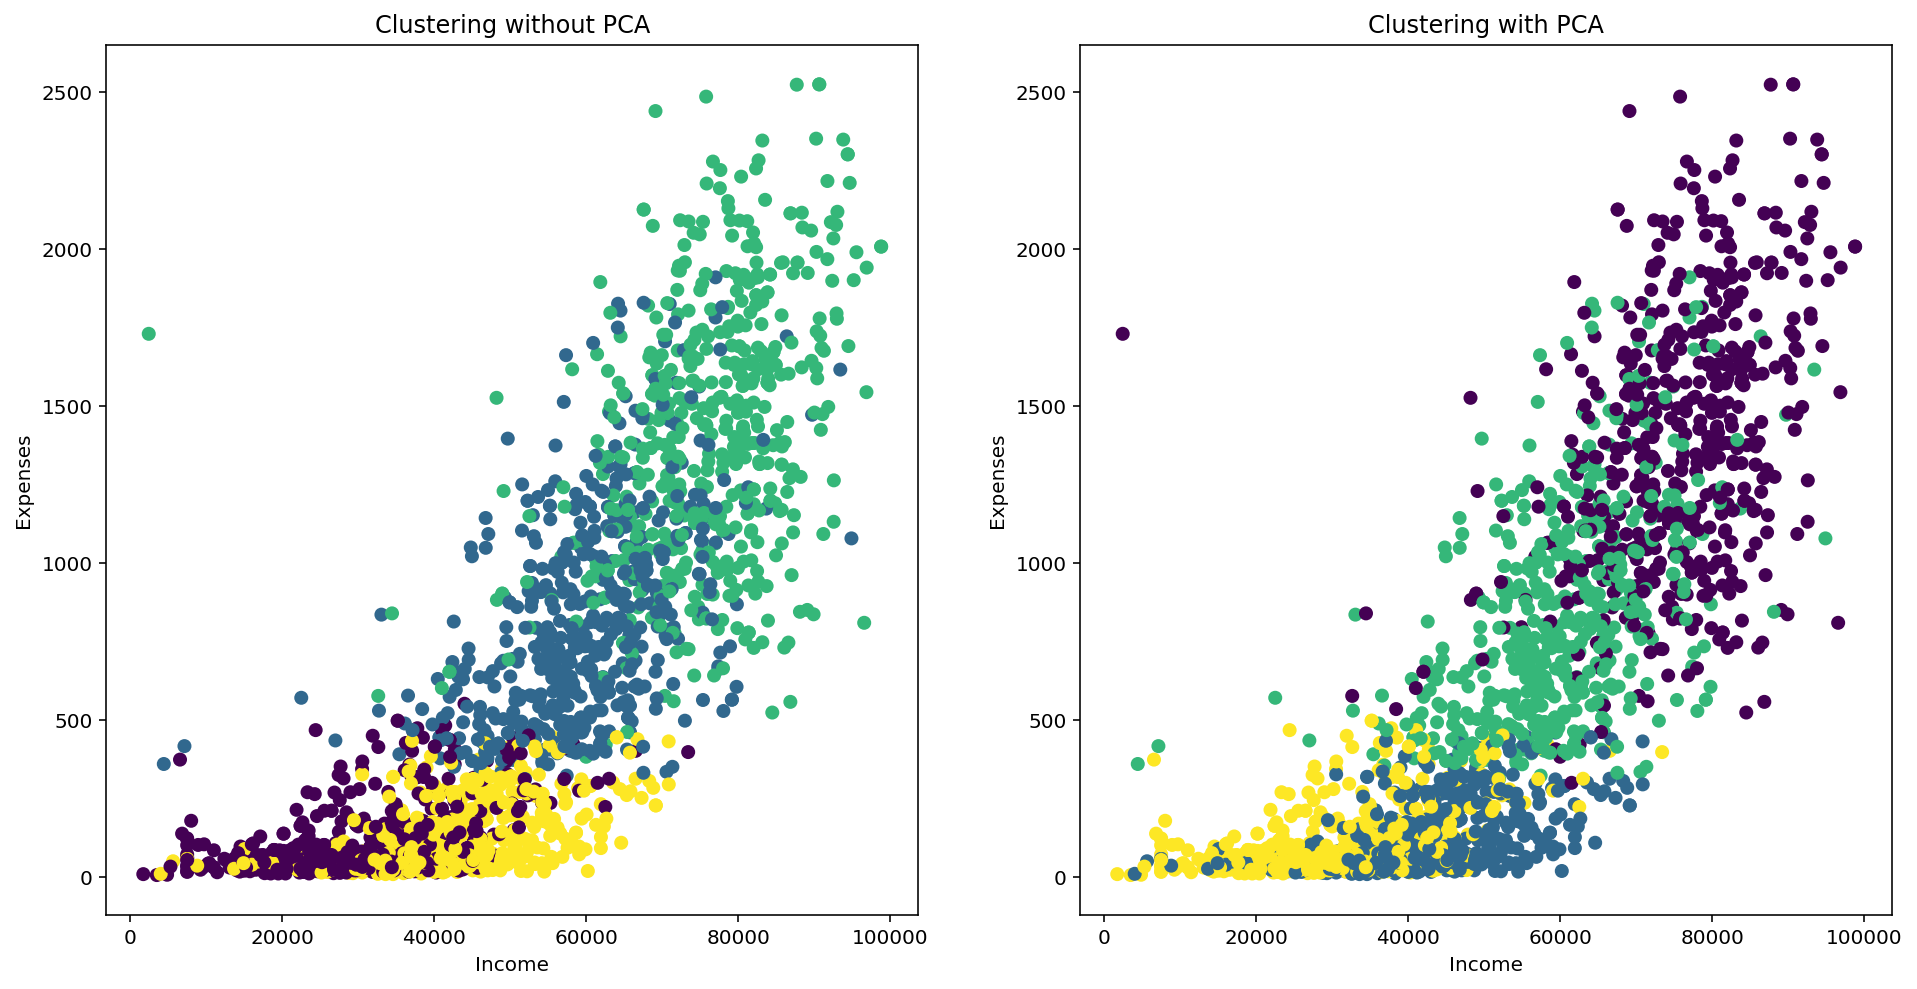

In [40]:
plot_2D(df_ff, "Income", "Expenses", cluster, cluster_pca)

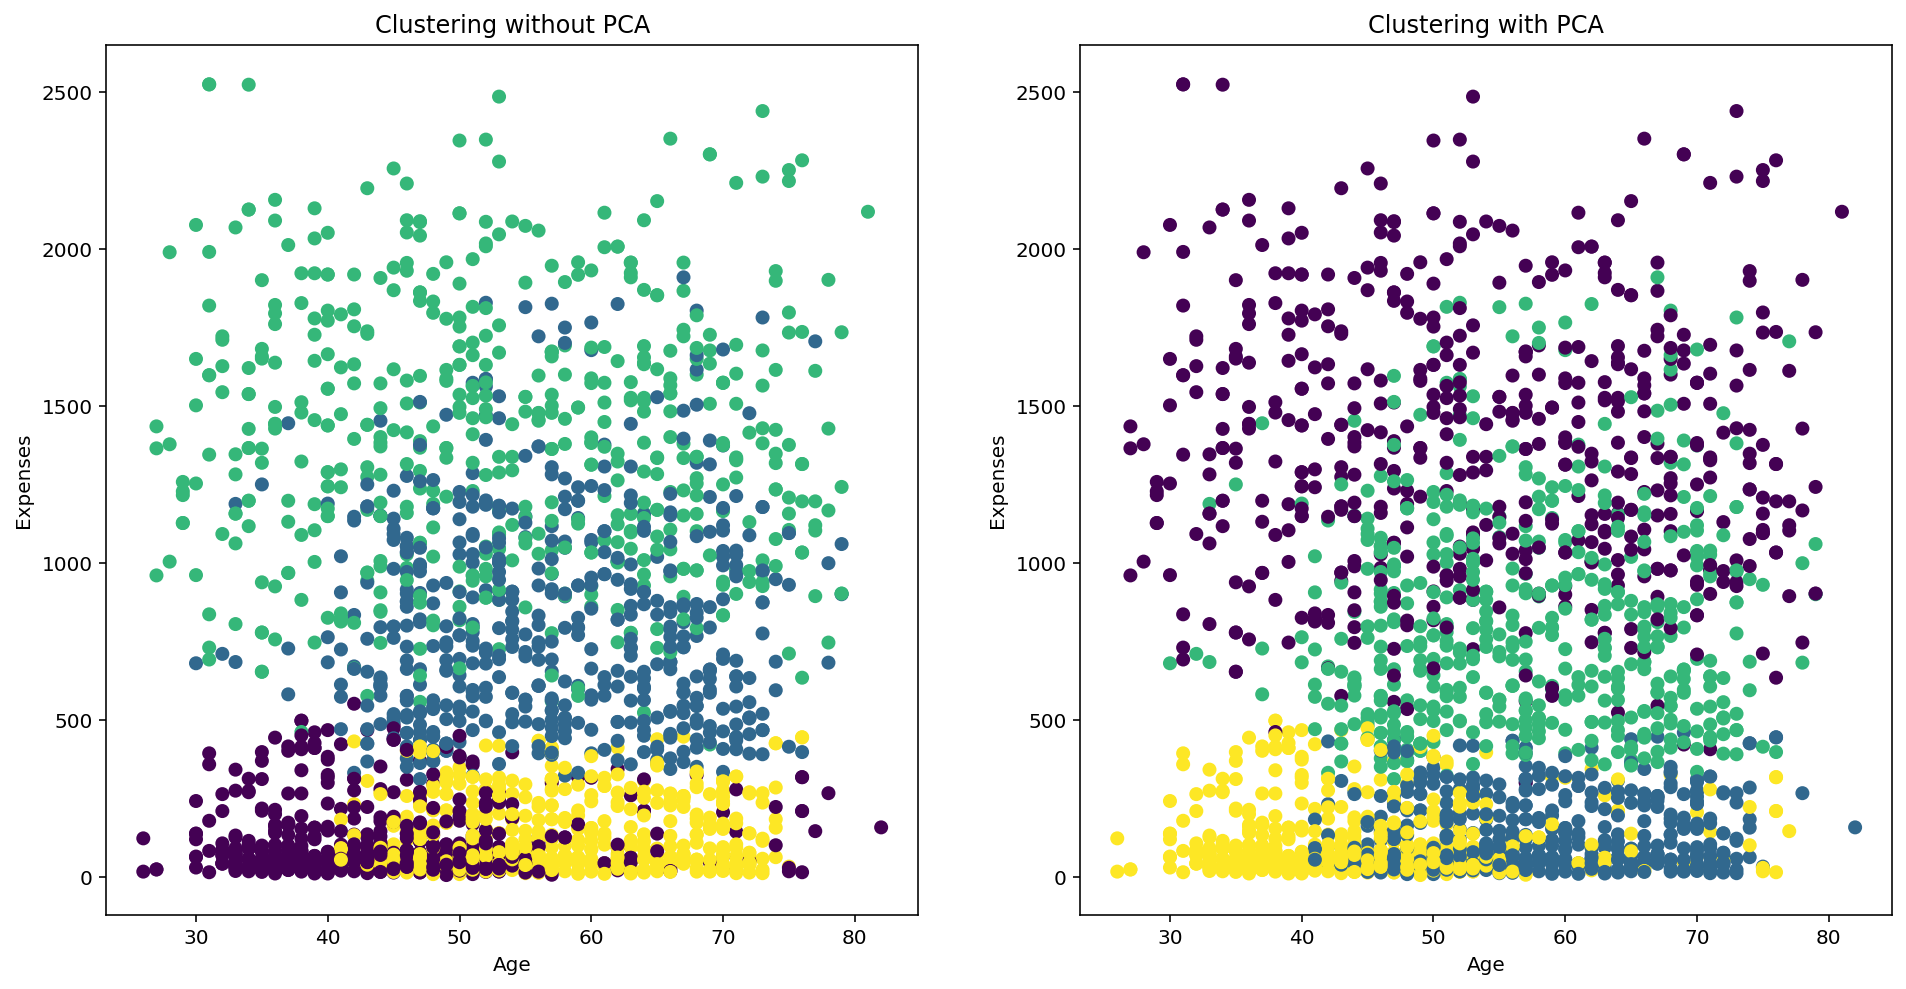

In [41]:
plot_2D(df_ff, "Age", "Expenses", cluster, cluster_pca)

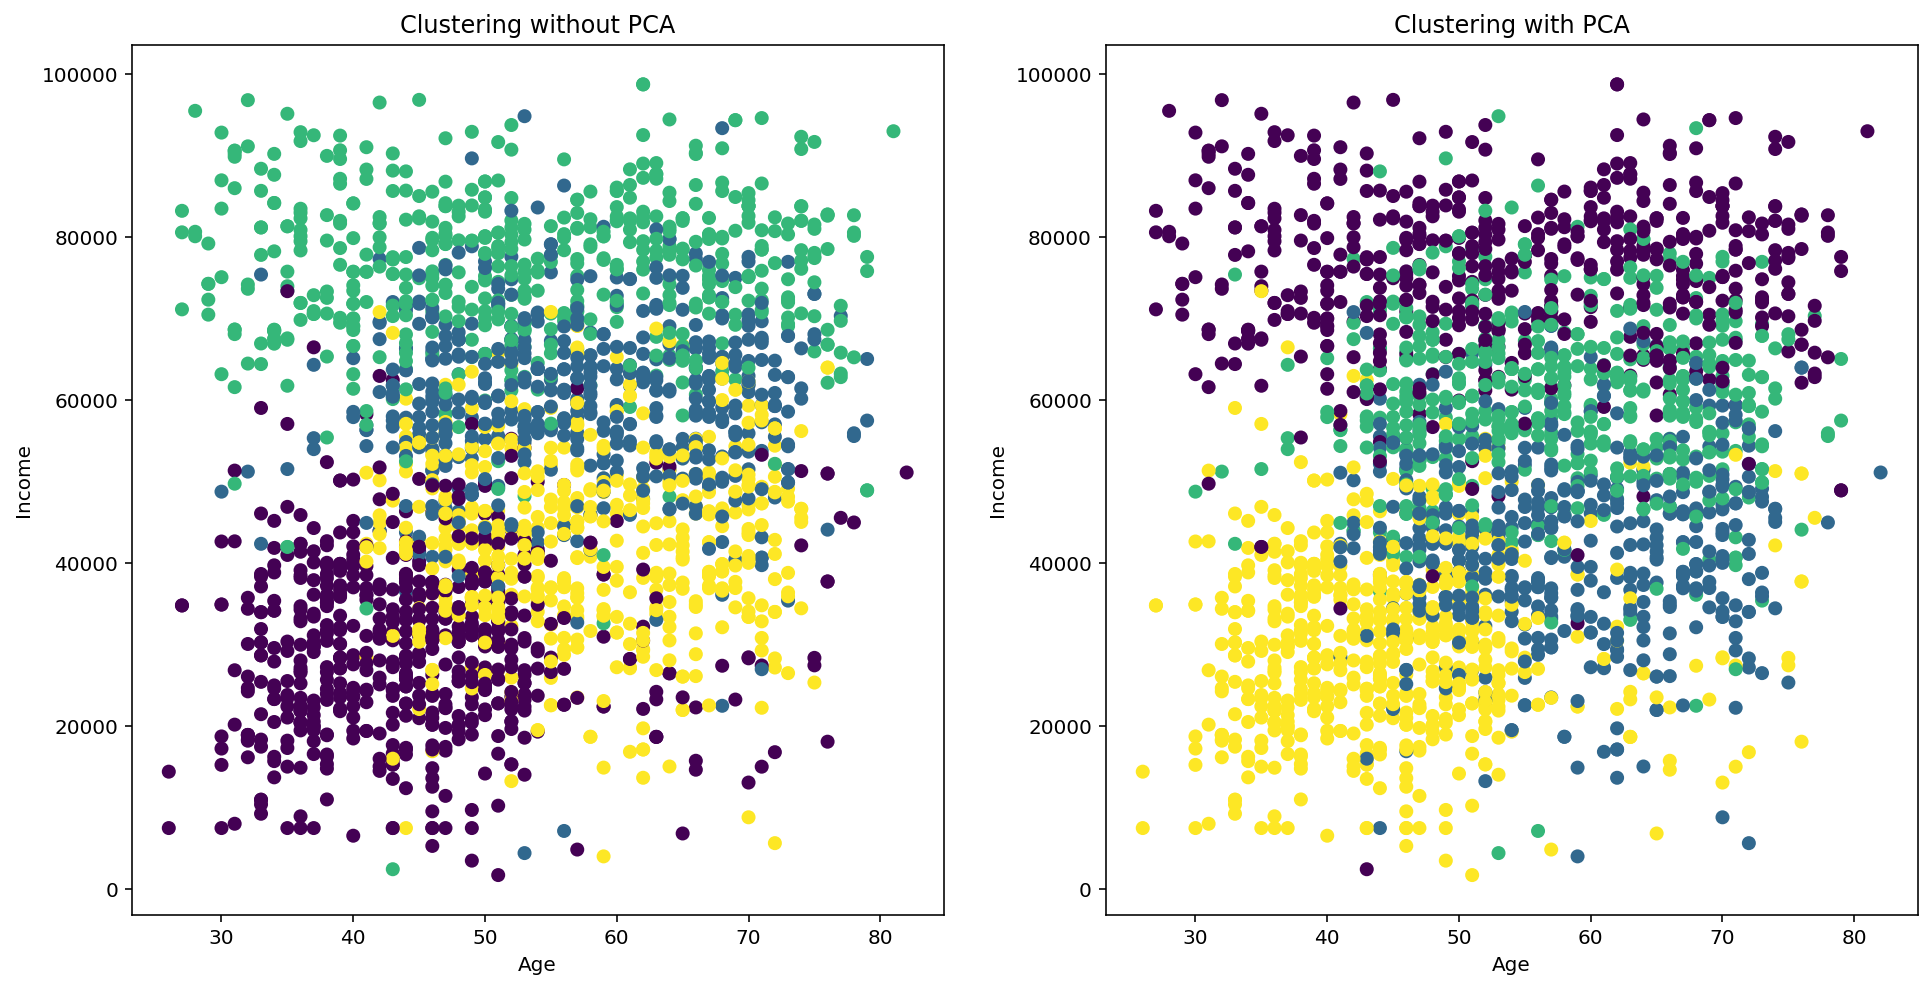

In [42]:
plot_2D(df_ff, "Age", "Income", cluster, cluster_pca)